In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
matches=pd.read_csv('matches.csv')
matches.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
matches["date"]=pd.to_datetime(matches["date"])
matches.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
# reshape and calc team metrics

team_performance=matches.melt(
    id_vars=["id","season","date","winner","result","result_margin","target_runs"],
    value_vars=["team1","team2"],
    var_name="team",
    value_name="team_name"

)

team_performance["is_winner"]=(team_performance["team_name"]==team_performance["winner"]).astype(int)
team_performance["runs_scored"]=team_performance["target_runs"]
team_performance["runs_conceded"]=team_performance.groupby("id")["target_runs"].transform("sum")-team_performance["target_runs"]

team_performance.head(5)

,id,season,date,winner,result,result_margin,target_runs,team,team_name,is_winner,runs_scored,runs_conceded
0,335982,2007/08,2008-04-18,Kolkata Knight Riders,runs,140.0,223.0,team1,Royal Challengers Bangalore,0,223.0,223.0
1,335983,2007/08,2008-04-19,Chennai Super Kings,runs,33.0,241.0,team1,Kings XI Punjab,0,241.0,241.0
2,335984,2007/08,2008-04-19,Delhi Daredevils,wickets,9.0,130.0,team1,Delhi Daredevils,1,130.0,130.0
3,335985,2007/08,2008-04-20,Royal Challengers Bangalore,wickets,5.0,166.0,team1,Mumbai Indians,0,166.0,166.0
4,335986,2007/08,2008-04-20,Kolkata Knight Riders,wickets,5.0,111.0,team1,Kolkata Knight Riders,1,111.0,111.0


In [ ]:
# aggregated data for each team
team_performance_agg=team_performance.groupby(["date","team_name"]).agg({
    "is_winner":"sum",
    "runs_scored":"sum",
    "runs_conceded":"sum"
}).sort_values("date").reset_index()

team_performance_agg["net_run_rate"]=team_performance_agg["runs_scored"]-team_performance_agg["runs_conceded"]
team_performance_agg

,date,team_name,is_winner,runs_scored,runs_conceded,net_run_rate
0,2008-04-18,Kolkata Knight Riders,1,223.0,223.0,0.0
1,2008-04-18,Royal Challengers Bangalore,0,223.0,223.0,0.0
2,2008-04-19,Chennai Super Kings,1,241.0,241.0,0.0
3,2008-04-19,Delhi Daredevils,1,130.0,130.0,0.0
4,2008-04-19,Kings XI Punjab,0,241.0,241.0,0.0
...,...,...,...,...,...,...
2185,2024-05-22,Royal Challengers Bengaluru,0,173.0,173.0,0.0
2186,2024-05-24,Rajasthan Royals,0,176.0,176.0,0.0
2187,2024-05-24,Sunrisers Hyderabad,1,176.0,176.0,0.0
2188,2024-05-26,Kolkata Knight Riders,1,114.0,114.0,0.0


In [ ]:
team_name = "Kolkata Knight Riders"
team_data = team_performance_agg[team_performance_agg["team_name"] ==team_name]
team_data

,date,team_name,is_winner,runs_scored,runs_conceded,net_run_rate
0,2008-04-18,Kolkata Knight Riders,1,223.0,223.0,0.0
7,2008-04-20,Kolkata Knight Riders,1,111.0,111.0,0.0
22,2008-04-26,Kolkata Knight Riders,0,148.0,148.0,0.0
30,2008-04-29,Kolkata Knight Riders,0,138.0,138.0,0.0
36,2008-05-01,Kolkata Knight Riders,0,197.0,197.0,0.0
...,...,...,...,...,...,...
2148,2024-05-03,Kolkata Knight Riders,1,170.0,170.0,0.0
2155,2024-05-05,Kolkata Knight Riders,1,236.0,236.0,0.0
2166,2024-05-11,Kolkata Knight Riders,1,158.0,158.0,0.0
2182,2024-05-21,Kolkata Knight Riders,1,160.0,160.0,0.0


In [ ]:
team_data=team_data.sort_values("date")
team_data.set_index("date",inplace=True)
team_data

,team_name,is_winner,runs_scored,runs_conceded,net_run_rate
date,,,,,
2008-04-18,Kolkata Knight Riders,1,223.0,223.0,0.0
2008-04-20,Kolkata Knight Riders,1,111.0,111.0,0.0
2008-04-26,Kolkata Knight Riders,0,148.0,148.0,0.0
2008-04-29,Kolkata Knight Riders,0,138.0,138.0,0.0
2008-05-01,Kolkata Knight Riders,0,197.0,197.0,0.0
...,...,...,...,...,...
2024-05-03,Kolkata Knight Riders,1,170.0,170.0,0.0
2024-05-05,Kolkata Knight Riders,1,236.0,236.0,0.0
2024-05-11,Kolkata Knight Riders,1,158.0,158.0,0.0


In [ ]:
# select the column to predict (runs scored)

time_series=team_data["runs_scored"]

# stationarity check (ADF test)

adf_result=adfuller(time_series)
print("ADF Statistic:",adf_result[0])
print("p-value:",adf_result[1])
if adf_result[1]>0.05:
  print('The time series is not stationary, differencing is required.')

ADF Statistic: -7.214074913565808
p-value: 2.1963196715516396e-10


In [ ]:
if adf_result[1] >0.05:
  time_series_diff = time_series.diff().dropna()
else:
  time_series_diff = time_series

In [ ]:
train_size  = int(len(time_series_diff)*0.8)

train ,test = time_series_diff[:train_size] , time_series_diff[train_size:]

In [ ]:
model = ARIMA(train , order =(1,1,1))
fitted_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast  = fitted_model.forecast(steps =len(test))
forecast.index =test.index
forecast.head(5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
date,
2021-09-23,160.975878
2021-09-26,166.173245
2021-09-28,166.570630
2021-10-01,166.601014
2021-10-03,166.603337


In [ ]:
import numpy as np
actual_runs = test.values
forecast_runs = forecast.values

mae = np.mean(np.abs(actual_runs - forecast_runs))
print(f"Mean Absolute Error (MAE): ",mae )
rmse  = np.sqrt(np.mean((actual_runs - forecast_runs)**2))
print(f"Root Mean Squared Error (RMSE): ",rmse )

Mean Absolute Error (MAE):  28.84228337144472
Root Mean Squared Error (RMSE):  37.5213765172496


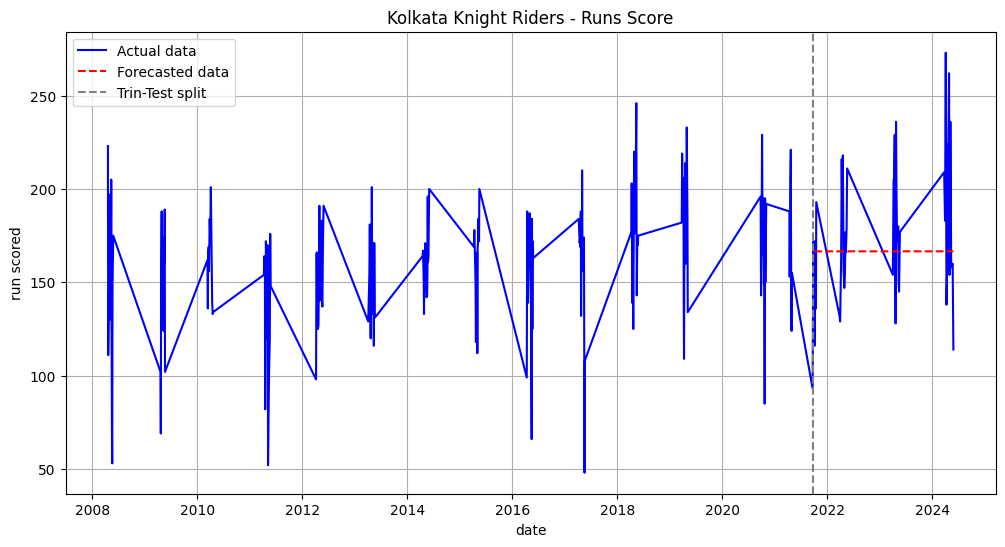

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(time_series_diff , label ="Actual data" , color ="blue")
plt.plot(forecast ,label ="Forecasted data" , color="red", linestyle ="--")
plt.axvline(x =test.index[0], color="gray", linestyle = "--",label = "Trin-Test split")
plt.title(f"{team_name} - Runs Score")
plt.xlabel("date")
plt.ylabel("run scored")
plt.legend()
plt.grid()
plt.show()